In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df=df.drop(columns='CustomerID')

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [19]:
features=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [20]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

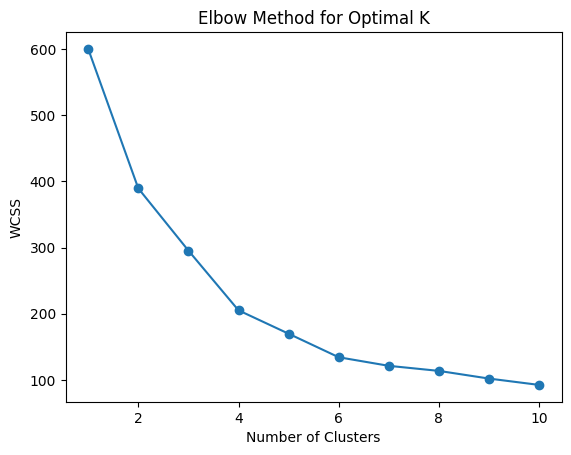

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

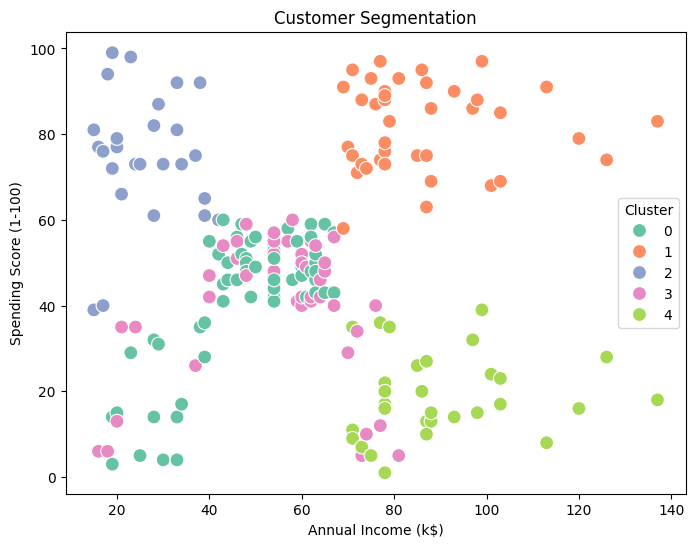

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segmentation")
plt.show()

In [24]:
df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.431034,55.275862,47.620690,41.706897
1,0.450000,32.875000,86.100000,81.525000
2,0.423077,25.769231,26.115385,74.846154
3,0.400000,26.733333,54.311111,40.911111
4,0.516129,44.387097,89.774194,18.483871


In [25]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

kmeans_score = silhouette_score(scaled_features, df['KMeans_Cluster'])
print("KMeans Silhouette Score:", kmeans_score)


KMeans Silhouette Score: 0.40846873777345605


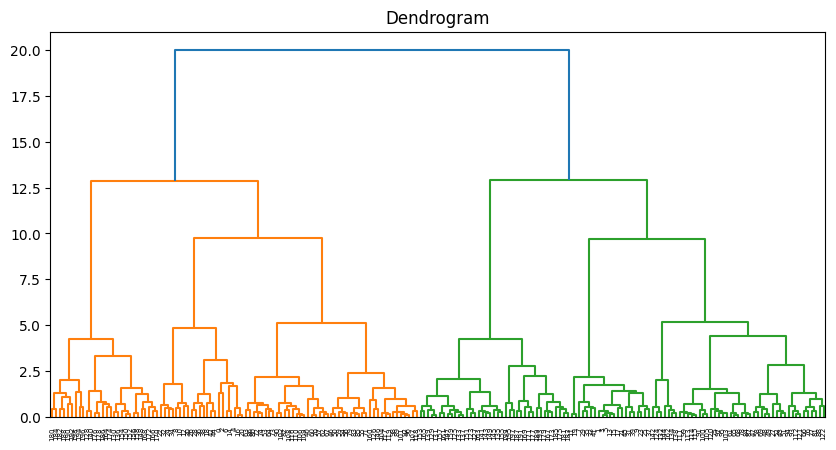

Hierarchical Silhouette Score: 0.39002826186267214


In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrogram to help decide number of clusters
linkage_matrix = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.show()

# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)

hc_score = silhouette_score(scaled_features, df['Hierarchical_Cluster'])
print("Hierarchical Silhouette Score:", hc_score)


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]


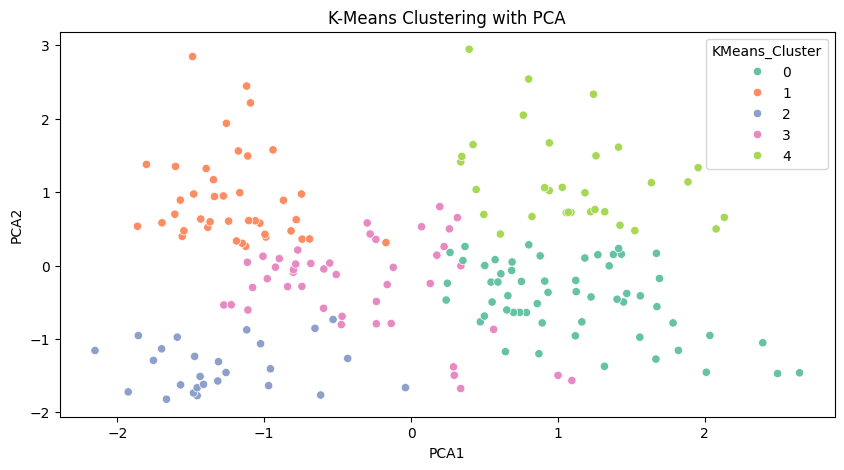

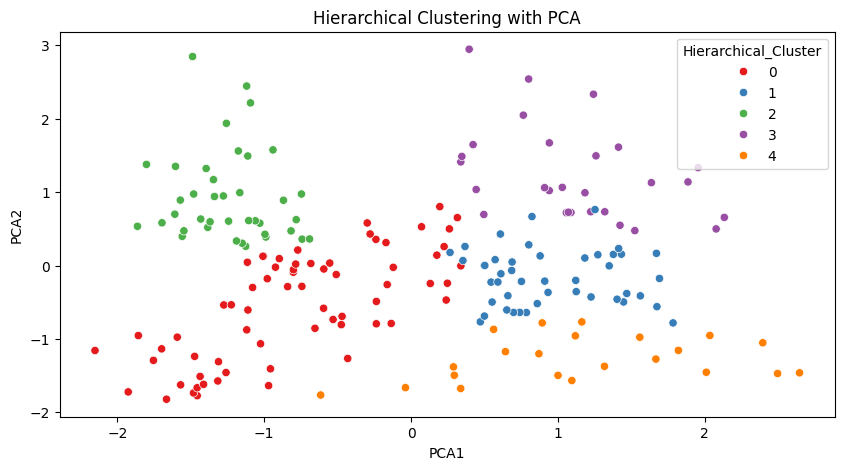

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2')
plt.title("K-Means Clustering with PCA")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set1')
plt.title("Hierarchical Clustering with PCA")
plt.show()


Cluster 3 consists of high-income, high-spending customers — ideal for premium product ads. Cluster 1 represents low-income, low-spending — better for budget deals."/

In [33]:
# Save to CSV
df.to_csv("customer_segments.csv", index=False)
print("Clusters exported successfully to 'customer_segments.csv'")

Clusters exported successfully to 'customer_segments.csv'
